## Code to view example images from each class, with and without transformations

In [1]:
import pandas as pd
import numpy as np

import torch
import pathlib
import random
import cv2
import gc
import sys
import matplotlib.pyplot as plt
from collections import Counter

import solt as sl
import solt.transforms as slt
import sklearn.model_selection as ms
import torch.nn.functional as F

from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score
from torch import nn
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import torchvision.models as models
import torch.optim as optim

import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import time
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device}')

Using cpu


In [2]:
base_path = "C:/Users/anush/OneDrive/Documents/Sem3/AI in Health Technology/Project/"

In [3]:
data = pd.read_csv(base_path + "data_asDownloaded/train.csv")

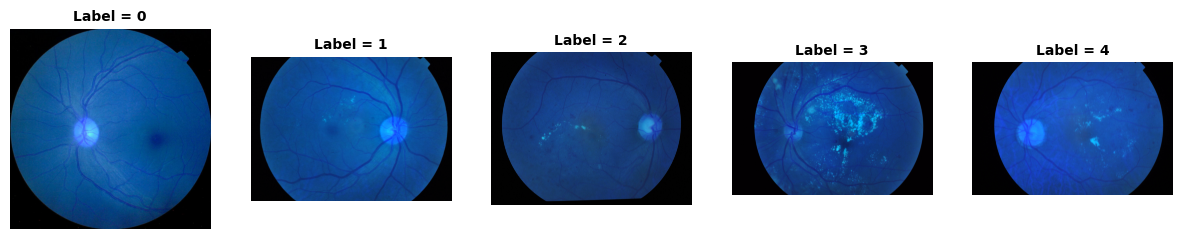

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
for i in range(5):
    sample = data[data['diagnosis'] == i].sample(1)
    image_name = sample['id_code'].item()
    X = cv2.imread(base_path + "data/train/" + str(sample['diagnosis'].item()) + "/" + image_name + ".png")
    #print(X.shape)
    ax[i].set_title(f"Label = {sample['diagnosis'].item()}", 
                    weight='bold', fontsize=10)
    ax[i].axis('off')
    ax[i].imshow(X);

In [15]:
def get_train_transform():
    train_transform = transforms.Compose([
        transforms.ColorJitter(brightness= [1.4, 1.6], contrast = [1.5,2]),
        transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
        transforms.Resize((380, 380))
        #transforms.ToTensor(),
        #normalize_transform()
    ])
    return train_transform

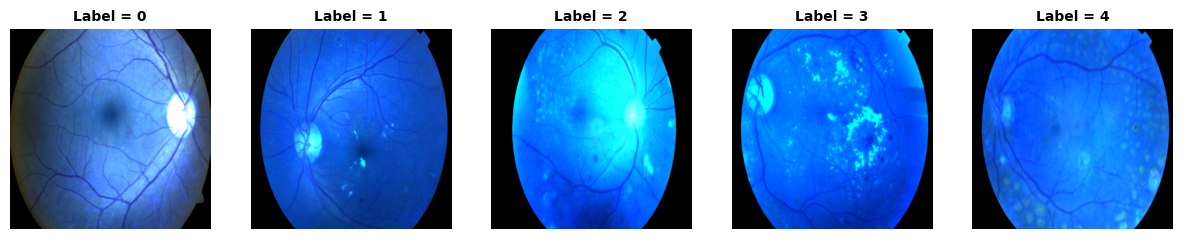

In [29]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
for i in range(5):
    sample = data[data['diagnosis'] == i].sample(1)
    image_name = sample['id_code'].item()
    X = cv2.imread(base_path + "data/train/" + str(sample['diagnosis'].item()) + "/" + image_name + ".png")
    X = Image.fromarray(X)
    tf = get_train_transform()
    X = tf(X)
    ax[i].set_title(f"Label = {sample['diagnosis'].item()}", 
                    weight='bold', fontsize=10)
    ax[i].axis('off')
    ax[i].imshow(X);